# 0. Introduction
- Artificial Intelligence
- Computer Vision


## AI
- AI는 컴퓨터가 인간처럼 행동할 수 있게 하는 Computer Science의 한 분야이다.

![nn](./img/TypeofAI.JPG)

## Application of AI

- Natural language processing
- Robotics
- Machine learning and deep learning
- Expert systems
- Speech or voice recognition
- Intelligent automation
- Computer vision


## Computer Vision
- Computer vision은 시각적인 데이터를 처리하는 Computer Science의 한 분야이다.

![nn](./img/objectdetection.JPG)

## Image
- 이미지는 유한한 개수의 행과 열로 구성된 2차원 행렬이다


- 이미지의 폭은 행렬의 열로, 높이는 행렬의 행으로 나타낸다.


- 이미지는 많은 수의 픽셀로 구성되며, 픽셀은 이미지의 핵심 요소이다.


- 한 개의 픽셀은 행렬의 한 성분으로 나타내며, 0에서 255 사이의 값을 갖는다.


- RGB 3개 채널에 대한 조합으로 이미지의 색을 나타낼 수 있다.

## Process of Computer Vision System
![nn](./img/InOut.JPG)

# 1. OpenCV with python
- OpenCV: 가장 많이 사용되는 컴퓨터 비전 프레임워크
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

## 1) 이미지
### ① 이미지 읽고 나타내기

In [2]:
# module import
import cv2
print(cv2.__version__)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

4.4.0


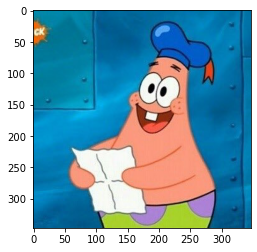

In [2]:
# Matplotlib으로 나타내기
image = imread("./img/star.jpg")
plt.imshow(image)
plt.show()

In [3]:
# OpenCV로 나타내기
img = cv2.imread("./img/star.jpg") # 한글 이름 들어가면 에러 뜸..

In [4]:
img.shape # (row, column, channel)

(347, 347, 3)

In [5]:
# 원래 이미지
cv2.imshow("star", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 흑백 이미지
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert color 
cv2.imshow("gray star", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 그 외..
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)  
cv2.imshow("gray star", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ② 이미지를 히스토그램으로 나타내기
- 히스토그램은 이미지의 색감, 밝기, 대조 등을 나타낸다.

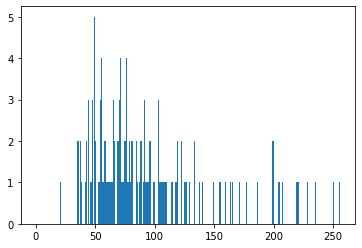

In [8]:
# 히스토그램 생성하기
hist_img = cv2.calcHist([img],[0],None,[256],[0,256]) 
plt.hist(hist_img.ravel(), bins=256, range=[0,256])  # ravel(): flatten(2차원 -> 1차원), bins: range를 몇 개로 나눌 것인가?
plt.show()

![nn](./img/calchist.JPG)

- https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html

In [9]:
# flatten
print(hist_img.shape) # 2차원
print(hist_img.ravel().shape) #1차원

(256, 1)
(256,)


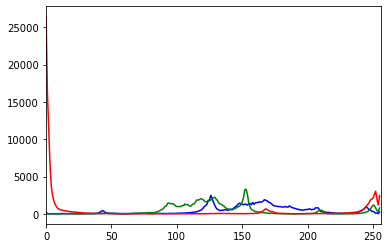

In [10]:
# RGB 분포 나타내기
color = ['b','g','r'] # OpenCV는 RGB가 아닌 BGR 순서로 나타낸다.
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.show()

## 2) 비디오
### ① 웹캠 열기 및 디스플레이

In [12]:
cap = cv2.VideoCapture(0) # 몇 번째 웹캠에 접근할 것인가?

while True: # while loop: 비디오 = 이미지의 연속
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(delay = 1) # 키보드 입력을 대기하는 함수
    # waitKey(25) will display a frame for 25  ms, after which display will be automatically closed
    if key == 27: # ESC = 27
        break
        
cap.release() # instance 종료
cv2.destroyAllWindows()

### ② 웹캠 저장하기

In [13]:
cap = cv2.VideoCapture(0) # 웹캠 0번의 인스턴스 cap 생성 
fps = 20.0                   # 초당 프레임 수
width, height= 640,480     # 저장할 영상의 크기: (너비, 높이)

# ① 코덱 정의하기 
fourcc = cv2.VideoWriter_fourcc(*'MJPG') # XVID 등

# ② VideoWriter() 인스턴스 생성
out = cv2.VideoWriter('output.avi',fourcc, fps, (width, height))

while(cap.isOpened()):
    retval, frame = cap.read()
    if retval==True:
        out.write(frame)   # ③ output.avi로 프레임 기록하기

        cv2.imshow('Video0',frame)
        if cv2.waitKey(1) & 0xFF == 27: # Esc 키를 누르면 break
            break
    else:
        break

# 작업이 끝나면 모든 인스턴스들을 해제해야 한다.
cap.release() # ④ 비디오 캡쳐 클래스의 인스턴스 해제.
out.release() # ⑤ 프레임 쓰기 클래스의 인스턴스 해제.
cv2.destroyAllWindows()

#### * 웹캠으로 할 수 있는 것: Motion Sensor

In [4]:
cap=cv2.VideoCapture(0) #캡쳐 영상의 인스턴스 cap

while (cap.isOpened()):
       #① 연속한 두 프레임 얻기  
       (ret0, frame0)=cap.read() #frame0 캡쳐
       (ret1, frame1)=cap.read() #frame1 캡쳐

       #② bgr 영상 frame0와 frame1을 2D gray 영상으로 바꾼다. 
       frame0_gray = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
       frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

       #③ 차이 영상 diff=|frame0_gray-frame1_gray| 구하기 
       diff=np.abs(cv2.subtract(frame0_gray, frame1_gray))
       
       #④ diff 화소값들의 평균과 분산 프린트  
       m=np.mean(diff); s= np.std(diff)
       print(np.round((m, s), 2)) 

       key=cv2.waitKey(1) #Esc 키 입력 while 탈출
       if key==27: break

       cv2.imshow('frame', frame0) #bgr 영상 frame0 보여주기
       cv2.imshow('diff', diff)#차이 영상 보여주기

cap.release() #캡쳐 인스턴스 닫기
cv2.destroyAllWindows() #윈도우 닫기

[0.77 1.37]
[0.75 1.24]
[0.72 1.26]
[0.74 1.25]
[0.68 1.2 ]
[0.26 0.81]
[0.67 1.17]
[0.68 1.16]
[0.67 1.17]
[0.66 1.17]
[0.7  1.21]
[0.68 1.18]
[0.68 1.17]
[0.67 1.17]
[0.72 1.22]
[0.7  1.21]
[0.66 1.18]
[0.71 1.24]
[0.69 1.25]
[0.67 1.19]
[0.7  1.21]
[0.68 1.18]
[0.68 1.17]
[0.76 1.23]
[0.68 1.18]
[0.68 1.18]
[0.7  1.18]
[0.68 1.16]
[0.66 1.16]
[0.7  1.18]
[0.69 1.17]
[0.67 1.17]
[0.71 1.21]
[0.68 1.18]
[0.66 1.16]
[0.68 1.19]
[0.7  1.29]
[0.68 1.23]
[0.68 1.18]
[0.67 1.16]
[0.67 1.17]
[0.71 1.19]
[0.66 1.16]
[0.69 1.2 ]
[0.69 1.19]
[0.67 1.17]
[0.65 1.15]
[0.71 1.22]
[0.71 1.3 ]
[0.69 1.33]
[0.72 1.36]
[0.69 1.32]
[0.72 1.28]
[0.69 1.24]
[0.7 1.2]
[0.63 1.13]
[0.7  1.19]
[0.68 1.23]
[0.7  1.29]
[0.74 1.27]
[0.71 1.21]
[0.66 1.18]
[0.71 1.19]
[0.67 1.16]
[0.67 1.15]
[0.69 1.16]
[0.69 1.17]
[0.67 1.17]
[0.71 1.18]
[0.71 1.18]
[0.67 1.16]
[0.69 1.16]
[0.65 1.13]
[0.67 1.15]
[0.71 1.18]
[0.67 1.16]
[0.67 1.18]
[0.67 1.17]
[0.65 1.15]
[0.68 1.2 ]
[0.69 1.21]
[0.69 1.22]
[0.68 1.22]
[0.73 

### ③ 동영상 파일 읽고 디스플레이 하기

In [15]:
frozen = cv2.VideoCapture("./img/frozen.mp4")

while True:
    ret, frame = frozen.read()
    
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(25)
    if key == 27:
        break
        
frozen.release()
cv2.destroyAllWindows()

### ④ 동영상 파일 쓰기

In [16]:
frozen = cv2.VideoCapture("./img/frozen.mp4")

fcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("new_frozen.avi", fcc, 28, (640, 360))

while True:
    ret, f = frozen.read()
    f2 = cv2.flip(f, 0) # 0은 상하반전, 1은 좌우반전 

    cv2.imshow("frame2", f2)
    cv2.imshow("frame", f)
    
    out.write(f2)
    
    key = cv2.waitKey(20)
    if key == 27:
        break

out.release()
frozen.release()
cv2.destroyAllWindows()

# 2. Image Manipulation
## 1) 픽셀 수정하기

In [3]:
# 이미지 로드
star = cv2.imread('./img/star.jpg')
cv2.imshow("star", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 이미지 해상도
star.shape

(347, 347, 3)

In [5]:
# 특정 픽셀에 접근하기
pixel = star[200,250]
print(pixel)

[126 151 237]


In [6]:
# 픽셀 수정하기-1
star[200,250] = (0, 0, 0)
cv2.imshow("img", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 픽셀 수정하기-2
star[100:200,250:300] = (0, 0, 255)
cv2.imshow("modified", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2) 도형 및 텍스트 넣기

In [8]:
# 선 넣기
star = cv2.imread('./img/star.jpg')
cv2.line(star, (25,21), (100,100), (255,0,0), 5) # 시작점, 끝점, BGR, 두께
cv2.imshow("line", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 사각형 넣기
star = cv2.imread('./img/star.jpg')
cv2.rectangle(star, (25,21), (100,100), (255,0,0), 5) # top-left, lower-right, BGR, 두께
cv2.imshow("rectangle", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 원 넣기
star = cv2.imread('./img/star.jpg')
cv2.circle(star, (200,130), 70, (0,0,255), 5) # 중심, 반지름, 색, 두께
cv2.imshow("circle", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 텍스트 넣기
star = cv2.imread('./img/star.jpg')
cv2.putText(star, "star", (12,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),3) 
cv2.imshow("text", star)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 한글을 삽입하려면 PIL 패키지가 필요하다.
# http://www.gisdeveloper.co.kr/?p=8338a

## 3) 필터링

- 필터링을 통해 가운데값을 나머지의 median으로 채워넣는다.

![nn](./img/filtering.jpg)

In [12]:
flower = cv2.imread('./img/flower.jpg')
noise_reduced = cv2.medianBlur(flower,7)
cv2.imshow("original", flower)
cv2.imshow("corrected", noise_reduced)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4) 이미지 변환하기

- Affine 변환: 평행 관계를 유지한다.

![nn](./img/affine.jpg)
   

- Non-Affine 변환

![nn](./img/non-affine.jpg)


- Translation Matrix
![nn](./img/translation.png)

In [14]:
# 평행이동
star = cv2.imread('img/star.jpg')
w, h = star.shape[:2]

M = np.float32([[1, 0, 70], [0, 1, 50]]) # 오른쪽으로 +70, 아래쪽으로 +50

translation = cv2.warpAffine(star, M, (w, h))

cv2.imshow('translation', translation)
cv2.waitKey(0)
cv2.destroyAllWindows() 

- Rotation Matrix
![nn](./img/Rotation.png)


- getRotationMatrix2D 

![nn](./img/get_Rotate.png)

In [15]:
# 회전하기
star = cv2.imread('img/star.jpg')
w, h = star.shape[:2]

M = cv2.getRotationMatrix2D((w/5, h/2), 45, 1.2) # center 위치, 회전각, 배율

rotation = cv2.warpAffine(star, M, (w, h))

cv2.imshow("rotation", rotation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
 # 스케일링-1
star = cv2.imread('img/star.jpg')
scaled1 = cv2.resize(star, (500,400))  
cv2.imshow('scaled1', scaled1)
cv2.waitKey(0)
cv2.destroyAllWindows()    

In [17]:
 # 스케일링-2
star = cv2.imread('img/star.jpg')
scaled2 = cv2.resize(star, None, fx=3,fy=2, interpolation=cv2.INTER_CUBIC)  
cv2.imshow('scaled2', scaled2)
cv2.waitKey(0)
cv2.destroyAllWindows()    

- 이미지를 확대하거나 축소할 때는 interpolation이 사용된다.
    - 이미지를 확대하는 경우에는 linear 또는 cubic interpolation을 사용하는 것이 좋다.
    - cubic interpolation은 계산량이 많아서 linear interpolation보다 오래 걸리지만, 결과의 quality는 더 좋다.
    - 이미지를 축소할 때는 area-based interpolation이 좋다.

In [18]:
dolphin = cv2.imread('./img/dolphin.jpg')
dolphin = cv2.resize(dolphin, (720,400))  
dolphin_gray = cv2.cvtColor(dolphin, cv2.IMREAD_GRAYSCALE)
cv2.imshow("Original", dolphin_gray)
dolphin_canny = cv2.Canny(dolphin_gray, 50, 150) # minimum/maximum threshold
cv2.imshow("Canny Edge", dolphin_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6) Image Segmentation

In [19]:
# 이미지 불러오기
img = cv2.imread('img/segmentation.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, 50, 200)
cv2.imshow('canny', edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# segmentation 개수
contours, hierarchy = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)

4

In [21]:
# Contours line
blank_image = np.zeros(img.shape, dtype = "uint8")
cv2.drawContours(blank_image, contours, -1, (0,0,255), 3)

cv2.imshow('segmentation', blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7) Line Detection
- 허프 변환을 이용하여 이미지의 Line을 찾을 수 있다
- 기본적으로 허프변환은 직선의 방정식을 이용한다.

![nn](./img/huff.png)

In [22]:
# 이미지 불러오기
src = cv2.imread("./img/road.jpg")
src = cv2.resize(src, (640,480))
cv2.imshow("src", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# Line detection
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 100, 500, apertureSize=3) # apertureSize: 커널 사이즈
 
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 90, minLineLength = 1, maxLineGap = 15)
# cv2.HoughLinesP(검출 이미지, 거리, 각도, 임곗값, 최소 선 길이, 최대 선 간격)

for i in lines:
    cv2.line(src, (i[0][0], i[0][1]), (i[0][2], i[0][3]), (0, 0, 255), 2) # 시작접 및 끝점 입력

cv2.imshow("src", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3. Object Detection and Recognition
- 일반적으로 Object Detection과 Recognition은 유사한 의미로 쓰인다.
- Object Detection을 Recognition보다 넓은 의미로 사용하기도 한다.
    
![11](./img/detection.jpg)

## 1) Templete matching
- 템플릿을 슬라이딩하면서 이미지와의 상관계수를 계산한다. 

In [24]:
img = cv2.imread('./img/input.jpg')
cv2.imshow('input', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
templete = cv2.imread('./img/templete.jpg')
cv2.imshow('templete', templete)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
result = cv2.matchTemplate(img, templete, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) # 최솟값/최댓값 및 해당 위치(왼촉 상단 출력)
print(cv2.minMaxLoc(result))

(-26225878.0, 100128720.0, (140, 111), (109, 34))


In [27]:
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)

In [28]:
cv2.rectangle(img, top_left, bottom_right, (0,0,255), 5)
cv2.imshow('Where is templete?', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 객체가 회전하거나, 스케일링되거나, 색이 다르면 templete matching으로는 찾기 어렵다.

## 2) Image Feature
- 이미지의 feature를 기반으로 object detection을 할 수 있다.
- 가장 기본적인 형태의 feature는 point feature이다.
- point feature는 정보가 있는 interesting point와 정보가 없는 uninteresting point로 나눌 수 있다.

![.](./img/eiffel.jpg)

- interesting feature의 특징
    - 고유의 특징 반복
    - 픽셀값이 compact한가?
    - 국소적임
    
    
- 이미지의 세기가 변하는 경우는 크게 3가지로 나뉜다.
![](./img/feature_types.jpg)

### ① Corner Detection
- 픽셀값의 변화율이 최대인 지점을 찾는다.

In [29]:
img = cv2.imread('./img/leaf.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst, None, iterations=3)
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ② Scale Invariant Feature Transform(SIFT)
- 이미지의 크기와 회전에 불변하는 특징을 추출하는 알고리즘이다.

In [30]:
img = cv2.imread('img/leaf.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray, None)
print('Number of keypoints detected: ', len(keypoints))

Number of keypoints detected:  397


In [31]:
img = cv2.drawKeypoints(img, keypoints, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('SIFT', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ③ Oriented FAST and Rotated BRIEF(ORB)
- FAST keypoint detector와 BRIEF descriptor가 합쳐진 알고리즘이다.
- GPU 없이도 가볍게 돌릴 수 있으며, SIFT에 비해 속도가 매우 빠르다.

In [32]:
img = cv2.imread('img/leaf.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
kp = orb.detect(img, None)
kp, des = orb.compute(img, kp)
img2 = cv2.drawKeypoints(img, kp, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('ORB', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4. Motion Analysis and Object Tracking
- Object Tracking의 순서

![.](./img/tracking.jpg)


- Object Tracking의 어려움
    - Object occlusion: 다른 물체에 가려지는 경우
    - Speed: 물체의 속도가 빠른 경우
    - Shape: 모양이 일정하지 않은 경우
    - False positive: 유사한 물체가 많은 경우
    
    
## Step 1. Object Detection

- 객체의 cluster pixels과 video sequence에서 관심있는 Object(객체)를 identify 하는 과정이다.

![.](./img/step1.jpg)

- Frame differencing: 두 개의 연속되는 이미지 사이의 차이를 계산함으로써 움직이는 객체가 존재한다고 판단한다.
- Background subtraction: 배경으로부터 전경을 분리한다.
- Optical Flow: 두 개의 프레임 사이에 물체의 움직임 패턴을 찾는 방법이며, 계산량이 많아 Real-time에 적용하기에는 적절하지 않다.

In [33]:
# Background subtraction: KNN method
cap = cv2.VideoCapture(0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
fgbg = cv2.createBackgroundSubtractorKNN()

while True:
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    cv2.imshow('frame', fgmask)
    
    if cv2.waitKey(1) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [34]:
# Optical flow: Lucas-Kanade method
cap = cv2.VideoCapture('img/pig.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

In [35]:
# Dense Optical Flow
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()

## Step 2. Object Classification

- Object는 자동차, 새, 구름, 나무나 다른 움직이는 객체들로 분류될 수 있다.

![.](./img/step2.jpg)

- Shaped-based
    - Point, box 그리고 blob 등과 같은 특징으로 shape 정보로 분류한다.
    - template matching을 적용할 수 있어 연산량이 적고 빠르다. 
    - 동적인 환경에 알맞지 않으며, 내부의 움직임은 탐지가 불가능하다.
    
    
- Motion-based
    - Motion을 이용한 방법은 움직이지 않는 객체에 대해서는 추적을 할 수 없다는 단점이 있다. 
    - 객체가 가능한 계속 움직이는 환경에서 적용해야 좋은 알고리즘이다.
    
    
- Texture-based
    - 물체가 퍼진 부분을 그래디언트를 통해 계산한다.
    - 영상에 따라 부가적인 계산이 늘어 날 수 있다는 단점을 가지지만, 정확성은 높다. 
    
            
- Color-based
    - 색은 거의 일정하기 때문에 적절한 feature로 사용할 수 있다.
    - RGB 히스토그램을 기반으로 분류하며, Gaussian Mixture Model을 이용하여 보다 정확하게 객체를 분류할 수 있다.
    
    
## Step 3. Object Tracking

- 움직이는 장면에서 이미지에 있는 물체의 경로를 구하는 문제이다.

![.d](./img/step3.jpg)

- Point Tracking
    - 움직이는 물체의 feature point를 이용하는 방법이다.
    - 세부적으로 Kalman filtering과 Particle filtering, 그리고 Multiple hypothesis tracking 기법이 있다.
    
    
- Kernel Trakcing
    - 프레임 사이에 물체가 나타나는 부분을 계산한다.
    - 세부적으로 Simple Template Matching, Meanshift Method, SVM, Layering based 기법이 있다.
    
    
- Silhouette Tracking 
    - 대부분의 경우 물체의 모양은 일정하지 않다.
    - Silhouette based 방법은 물체의 모양을 정확하고 유연하게 인식한다.
    - 세부적으로 Contour Tracking과 Shape Matching 기법이 있다.

In [36]:
# Object Tracking: Meanshit Method

cap = cv2.VideoCapture('./img/meanshift.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(30) & 0xff
        
        if k == 27:
            break
    
cap.release()
cv2.destroyAllWindows()

In [37]:
# Object Tracking: Continuously Adaptive Meanshift(CAM)

cap = cv2.VideoCapture('./img/meanshift.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply camshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(30) & 0xff
        
        if k == 27:
            break
            
cap.release()
cv2.destroyAllWindows()